# Chapter 14: Quantum Associative Memory
### Qiskit 2.x

We store In four binary patterns,
\begin{equation}
  |101 \rangle_4,~~  |011 \rangle_3,~~ |111 \rangle_2,~~ |010 \rangle_1
\end{equation}
by entanglement  with the four index qubits $|  index_j    \rangle$ in superposition 
\begin{equation}
 | index_4    \rangle= |   11 \rangle~~~ | index_3 \rangle= |   10 \rangle~~~ 
   | index_2    \rangle= |   01 \rangle~~~| index_1   \rangle= |   00 \rangle
\end{equation}   
The  four patterns with their indexes represented in a uniform distribution of the states
\begin{equation}
| \psi  \rangle= \frac{1}{2} \cdot \left(   |00010 \rangle_1 + |01111 \rangle_2 + |10011 \rangle_3 +|11101 \rangle_4 \right).
\end{equation}
 We represent the patterns by the qubits $0$, $1$ and $2$ and the index by the qubits $3$ and $4$. the qubit $5$ represents the auxiliary qubit for the Grover's amplification.
 For simplicity our query vector is represented by the pattern $|111\rangle$. The quantum  oracle marks the solution by writing a one in the qubit $5$. The solution is the stored pattern $|111\rangle$  with the index $|index_2 \rangle= |   01 \rangle$

In [43]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 
from qiskit.circuit.library import MCXGate
from math import pi

In [44]:
qc = QuantumCircuit(6)

#1St magazine
#0-2 data
#Index
#3-4
qc.h(3)
qc.h(4)

#Aux Bit
#qc.x(5)
#qc.h(5)

qc.barrier()

#First patern

qc.ccx(3,4,0)
qc.ccx(3,4,2)

qc.barrier()
#Second patern

qc.x(3)

qc.ccx(3,4,0)
qc.ccx(3,4,1)

qc.x(3)

qc.barrier()
#Third patern

qc.x(4)

qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.ccx(3,4,2)

qc.x(4)

qc.barrier()
#Fourth patern

qc.x(3)
qc.x(4)

qc.ccx(3,4,1)

qc.x(4)
qc.x(3)

qc.barrier()
#Oracle
gate = MCXGate(3)
qc.append(gate,[0, 1, 2, 5])

qc.draw(fold=160)

░ ┌───┐      ░      ┌───┐           ░      ┌───┐                ░                 ░      
q_0: ──────░─┤ X ├──────░──────┤ X ├───────────░──────┤ X ├────────────────░─────────────────░───■──
           ░ └─┬─┘      ░      └─┬─┘┌───┐      ░      └─┬─┘┌───┐           ░      ┌───┐      ░   │  
q_1: ──────░───┼────────░────────┼──┤ X ├──────░────────┼──┤ X ├───────────░──────┤ X ├──────░───■──
           ░   │  ┌───┐ ░        │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░      └─┬─┘      ░   │  
q_2: ──────░───┼──┤ X ├─░────────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────────░───■──
     ┌───┐ ░   │  └─┬─┘ ░ ┌───┐  │    │  ┌───┐ ░        │    │  └─┬─┘      ░ ┌───┐  │  ┌───┐ ░   │  
q_3: ┤ H ├─░───■────■───░─┤ X ├──■────■──┤ X ├─░────────■────■────■────────░─┤ X ├──■──┤ X ├─░───┼──
     ├───┤ ░   │    │   ░ └───┘  │    │  └───┘ ░ ┌───┐  │    │    │  ┌───┐ ░ ├───┤  │  ├───┤ ░   │  
q_4: ┤ H ├─░───■────■───░────────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░───┼──
     └───┘ ░            ░                      ░ └───┘               └───┘ ░ └───┘     └───┘ ░ ┌─┴─┐
q_5: ──────░────────────░──────────────────────░───────────────────────────░─────────────────░─┤ X ├
           ░            ░                      ░                           ░                 ░ └───┘

The patterns are represented  by the qubits $0$, $1$ and $2$ and the index by the qubits $3$ and $4$. he qubit $5$ represents the auxiliary qubit for the Grover's amplification.
Our query vector is represented by the pattern $|111\rangle$. The   ccX gate (controlled controlled not gate)  marks the solution by writing a one in the qubit $5$. 


Total count are: {np.str_('000010'): np.float64(0.249999999999999), np.str_('010011'): np.float64(0.249999999999999), np.str_('011101'): np.float64(0.249999999999999), np.str_('101111'): np.float64(0.249999999999999)}


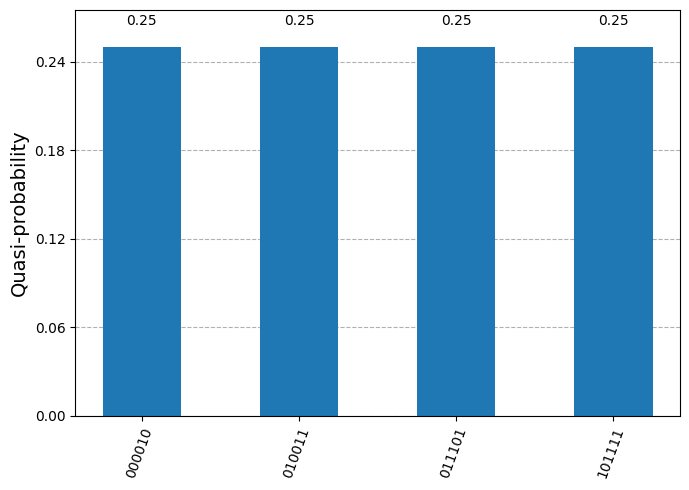

In [45]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

The  histogram representing the four patterns and their indexes  produces a uniform superposition. The solution  $|111\rangle$  with the the index $|index_2 \rangle= |   01 \rangle $ and the auxiliary qubit equal one, corresponds to the state $|01111\rangle$. 

Grover's amplification to the index qubits $3$ and $4$

In [46]:
qc = QuantumCircuit(6)

#1St magazine
#0-2 data
#Index
#3-4
qc.h(3)
qc.h(4)

#Aux Bit
qc.x(5)
qc.h(5)

qc.barrier()

#First patern

qc.ccx(3,4,0)
qc.ccx(3,4,2)

qc.barrier()
#Second patern

qc.x(3)

qc.ccx(3,4,0)
qc.ccx(3,4,1)

qc.x(3)

qc.barrier()
#Third patern

qc.x(4)

qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.ccx(3,4,2)

qc.x(4)

qc.barrier()
#Fourth patern

qc.x(3)
qc.x(4)

qc.ccx(3,4,1)

qc.x(4)
qc.x(3)

qc.barrier()
#Oracle
gate = MCXGate(3)
qc.append(gate,[0, 1, 2, 5])

qc.barrier()
#Redo Aux Bit
qc.h(5)
qc.barrier()
#Diffusor
qc.h([3,4])
qc.z([3,4])
qc.cz(3,4)
qc.h([3,4])

qc.draw(fold=160)

░ ┌───┐      ░      ┌───┐           ░      ┌───┐                ░                 ░       ░       ░                   
q_0: ───────────░─┤ X ├──────░──────┤ X ├───────────░──────┤ X ├────────────────░─────────────────░───■───░───────░───────────────────
                ░ └─┬─┘      ░      └─┬─┘┌───┐      ░      └─┬─┘┌───┐           ░      ┌───┐      ░   │   ░       ░                   
q_1: ───────────░───┼────────░────────┼──┤ X ├──────░────────┼──┤ X ├───────────░──────┤ X ├──────░───■───░───────░───────────────────
                ░   │  ┌───┐ ░        │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░      └─┬─┘      ░   │   ░       ░                   
q_2: ───────────░───┼──┤ X ├─░────────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────────░───■───░───────░───────────────────
     ┌───┐      ░   │  └─┬─┘ ░ ┌───┐  │    │  ┌───┐ ░        │    │  └─┬─┘      ░ ┌───┐  │  ┌───┐ ░   │   ░       ░ ┌───┐┌───┐   ┌───┐
q_3: ┤ H ├──────░───■────■───░─┤ X ├──■────■──┤ X ├─░────────■────■────■────────░─┤ X ├──■──┤ X ├─░───┼───░───────░─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤      ░   │    │   ░ └───┘  │    │  └───┘ ░ ┌───┐  │    │    │  ┌───┐ ░ ├───┤  │  ├───┤ ░   │   ░       ░ ├───┤├───┤ │ ├───┤
q_4: ┤ H ├──────░───■────■───░────────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░───┼───░───────░─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤┌───┐ ░            ░                      ░ └───┘               └───┘ ░ └───┘     └───┘ ░ ┌─┴─┐ ░ ┌───┐ ░ └───┘└───┘   └───┘
q_5: ┤ X ├┤ H ├─░────────────░──────────────────────░───────────────────────────░─────────────────░─┤ X ├─░─┤ H ├─░───────────────────
     └───┘└───┘ ░            ░                      ░                           ░                 ░ └───┘ ░ └───┘ ░


Total count are: {np.str_('100010'): np.float64(0.0625), np.str_('100011'): np.float64(0.0625), np.str_('100101'): np.float64(0.0625), np.str_('100111'): np.float64(0.0625), np.str_('101010'): np.float64(0.0625), np.str_('101011'): np.float64(0.0625), np.str_('101101'): np.float64(0.0625), np.str_('101111'): np.float64(0.0625), np.str_('110010'): np.float64(0.0625), np.str_('110011'): np.float64(0.0625), np.str_('110101'): np.float64(0.0625), np.str_('110111'): np.float64(0.0625), np.str_('111010'): np.float64(0.0625), np.str_('111011'): np.float64(0.0625), np.str_('111101'): np.float64(0.0625), np.str_('111111'): np.float64(0.0625)}


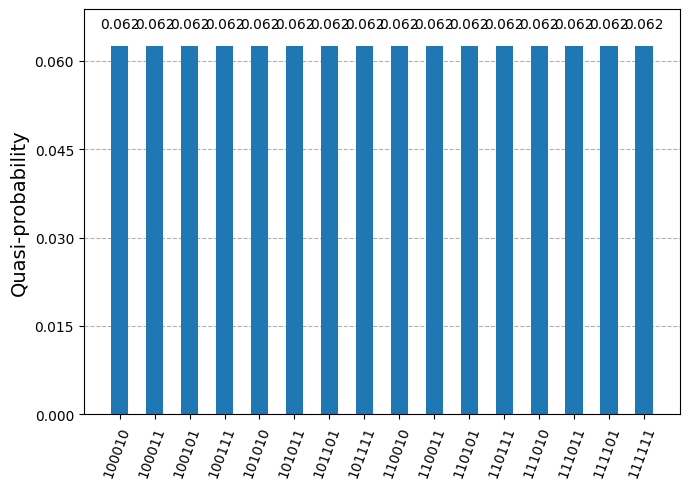

In [47]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

Since the index qubits are entangled with the patterns we do not get the correct results.

To apply Grover's amplification to the two index qubits, the  entanglement of the index qubits with the patterns has to be un-computed. For the four state we require just one rotation. 

In [48]:
def store():
    qc = QuantumCircuit(5)
    #First patern

    qc.ccx(3,4,0)
    qc.ccx(3,4,2)

    qc.barrier()
    #Second patern

    qc.x(3)

    qc.ccx(3,4,0)
    qc.ccx(3,4,1)

    qc.x(3)

    qc.barrier()
    #Third patern

    qc.x(4)

    qc.ccx(3,4,0)
    qc.ccx(3,4,1)
    qc.ccx(3,4,2)

    qc.x(4)

    qc.barrier()
    #Fourth patern

    qc.x(3)
    qc.x(4)

    qc.ccx(3,4,1)

    qc.x(4)
    qc.x(3)

    qc.name="Store"
    return qc

In [49]:
def store_inv():
    qc=store()
    qc_inv=qc.inverse()
    qc_inv.name="Store†"
    return qc_inv

In [50]:
qc = QuantumCircuit(6)

#1St magazine
#0-2 data
#Index
#3-4
qc.h(3)
qc.h(4)

#Aux Bit
qc.x(5)
qc.h(5)

qc.barrier()

qc.append(store(),range(5))

qc.barrier()
#Oracle
gate = MCXGate(3)
qc.append(gate,[0, 1, 2, 5])

qc.barrier()

qc.append(store_inv(),range(5))

qc.barrier()
#Redo Aux Bit
qc.h(5)
qc.barrier()
#Diffusor
qc.h([3,4])
qc.z([3,4])
qc.cz(3,4)
qc.h([3,4])

qc.barrier()

qc.draw(fold=160)


░ ┌────────┐ ░       ░ ┌─────────┐ ░       ░                    ░ 
q_0: ───────────░─┤0       ├─░───■───░─┤0        ├─░───────░────────────────────░─
                ░ │        │ ░   │   ░ │         │ ░       ░                    ░ 
q_1: ───────────░─┤1       ├─░───■───░─┤1        ├─░───────░────────────────────░─
                ░ │        │ ░   │   ░ │         │ ░       ░                    ░ 
q_2: ───────────░─┤2 Store ├─░───■───░─┤2 Store† ├─░───────░────────────────────░─
     ┌───┐      ░ │        │ ░   │   ░ │         │ ░       ░ ┌───┐┌───┐   ┌───┐ ░ 
q_3: ┤ H ├──────░─┤3       ├─░───┼───░─┤3        ├─░───────░─┤ H ├┤ Z ├─■─┤ H ├─░─
     ├───┤      ░ │        │ ░   │   ░ │         │ ░       ░ ├───┤├───┤ │ ├───┤ ░ 
q_4: ┤ H ├──────░─┤4       ├─░───┼───░─┤4        ├─░───────░─┤ H ├┤ Z ├─■─┤ H ├─░─
     ├───┤┌───┐ ░ └────────┘ ░ ┌─┴─┐ ░ └─────────┘ ░ ┌───┐ ░ └───┘└───┘   └───┘ ░ 
q_5: ┤ X ├┤ H ├─░────────────░─┤ X ├─░─────────────░─┤ H ├─░────────────────────░─
     └───┘└───┘ ░            ░ └───┘ ░             ░ └───┘ ░                    ░


Total count are: {np.str_('101000'): np.float64(0.999999999999999)}


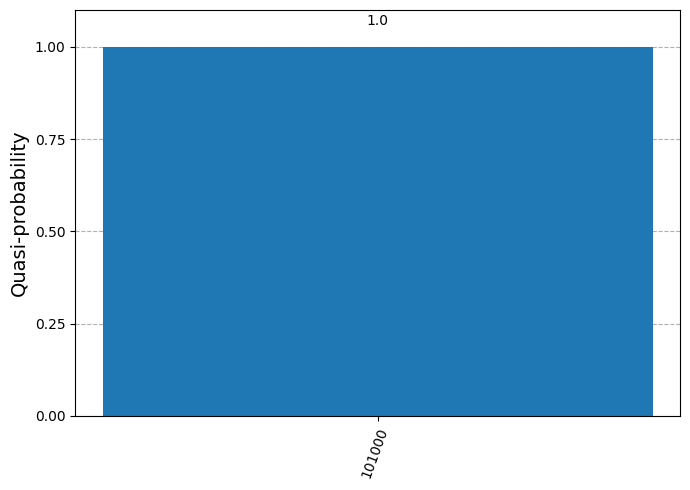

In [51]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

We measure the correct result represented by one state with the $|index_2 \rangle= |  01 \rangle$.

Instead of un-computing, we would like to apply Grover’s algorithm to the five qubits representing the patterns and the indexes.

In [52]:
qc = QuantumCircuit(6)

#1St magazine
#0-2 data
#Index
#3-4
qc.h(3)
qc.h(4)

#Aux Bit
qc.x(5)
qc.h(5)

qc.barrier()

qc.append(store(),range(5))

qc.barrier()
#Oracle
gate = MCXGate(3)
qc.append(gate,[0, 1, 2, 5])

qc.barrier()
#Redo Aux Bit
qc.h(5)
qc.barrier()
#Diffusor
gate = MCXGate(4)

qc.h([0,1,2,3,4])
qc.x([0,1,2,3,4])
qc.h([0])
qc.append(gate, [1,2,3,4,0])
qc.h([0])
qc.barrier()
qc.x([0,1,2,3,4])
qc.h([0,1,2,3,4])


qc.draw(fold=160)

░ ┌────────┐ ░       ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐
q_0: ───────────░─┤0       ├─░───■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
                ░ │        │ ░   │   ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤├───┤
q_1: ───────────░─┤1       ├─░───■───░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├
                ░ │        │ ░   │   ░       ░ ├───┤├───┤       │        ░ ├───┤├───┤
q_2: ───────────░─┤2 Store ├─░───■───░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├
     ┌───┐      ░ │        │ ░   │   ░       ░ ├───┤├───┤       │        ░ ├───┤├───┤
q_3: ┤ H ├──────░─┤3       ├─░───┼───░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├
     ├───┤      ░ │        │ ░   │   ░       ░ ├───┤├───┤       │        ░ ├───┤├───┤
q_4: ┤ H ├──────░─┤4       ├─░───┼───░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├
     ├───┤┌───┐ ░ └────────┘ ░ ┌─┴─┐ ░ ┌───┐ ░ └───┘└───┘                ░ └───┘└───┘
q_5: ┤ X ├┤ H ├─░────────────░─┤ X ├─░─┤ H ├─░───────────────────────────░───────────
     └───┘└───┘ ░            ░ └───┘ ░ └───┘ ░                           ░


Total count are: {np.str_('100000'): np.float64(0.00390625), np.str_('100001'): np.float64(0.00390625), np.str_('100010'): np.float64(0.191406249999999), np.str_('100011'): np.float64(0.00390625), np.str_('100100'): np.float64(0.00390625), np.str_('100101'): np.float64(0.00390625), np.str_('100110'): np.float64(0.00390625), np.str_('100111'): np.float64(0.00390625), np.str_('101000'): np.float64(0.00390625), np.str_('101001'): np.float64(0.00390625), np.str_('101010'): np.float64(0.00390625), np.str_('101011'): np.float64(0.00390625), np.str_('101100'): np.float64(0.00390625), np.str_('101101'): np.float64(0.00390625), np.str_('101110'): np.float64(0.00390625), np.str_('101111'): np.float64(0.316406249999998), np.str_('110000'): np.float64(0.00390625), np.str_('110001'): np.float64(0.00390625), np.str_('110010'): np.float64(0.00390625), np.str_('110011'): np.float64(0.191406249999999), np.str_('110100'): np.float64(0.00390625), np.str_('110101'): np.float64(0.00390625), np.str_('11011

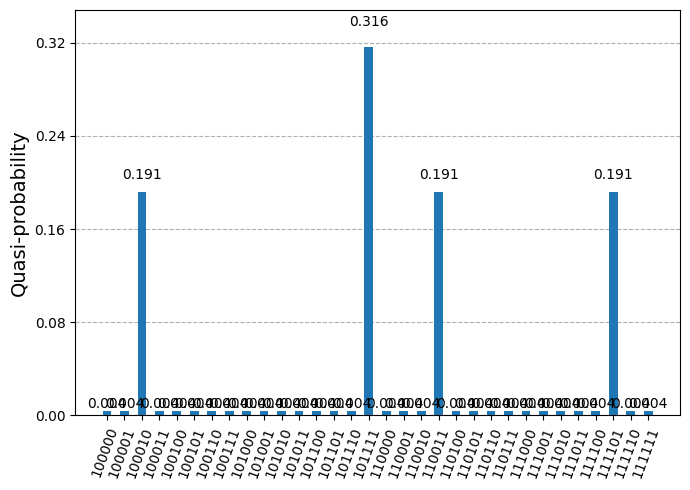

In [53]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose().decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

Measuring the states after one rotation of Grover's amplification indicates us that something wired is happening.


## Quantum Associative Memory (QuAM)

In the quantum associative memory  (QuAM)  as proposed by Venture and Martinez, a modified version of Grover’s search algorithm is applied to determine the answer vector to a query vector. 

In [54]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from math import pi

From the initial distribution we mark the target state $|0110 \rangle$ by a negative phase and perform a Grover's rotation 

In [55]:
qc = QuantumCircuit(5)

#1St magazine
#0-1 data
#Index
#2-3
qc.h(2)
qc.h(3)


#Aux Bit
qc.x(4)
qc.h(4)

qc.barrier()
#First patern
qc.ccx(2,3,0)
qc.ccx(2,3,1)

qc.barrier()
#Second patern
qc.x(2)
qc.ccx(2,3,0)
qc.x(2)

qc.barrier()
#Third patern
qc.x(3)
qc.ccx(2,3,1)
qc.x(3)

qc.barrier()
#Fourth patern
qc.x(2)
qc.x(3)
qc.ccx(2,3,0)
qc.ccx(2,3,1)
qc.x(3)
qc.x(2)

#Oracle
qc.barrier()
qc.x(0)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(0)
qc.barrier()
qc.h(4)
#Diffusor 0, 1, 2, 3 
qc.barrier()

qc.h([0,1,2,3])
qc.x([0,1,2,3])
qc.h(0)
gate = MCXGate(3)
qc.append(gate, [1,2,3,0])
qc.h(0)
qc.x([0,1,2,3])
qc.h([0,1,2,3])

#qc.rz(2*pi,1)


qc.draw(fold=160)


░ ┌───┐      ░      ┌───┐      ░                 ░      ┌───┐           ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q_0: ───────────░─┤ X ├──────░──────┤ X ├──────░─────────────────░──────┤ X ├───────────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
                ░ └─┬─┘┌───┐ ░      └─┬─┘      ░      ┌───┐      ░      └─┬─┘┌───┐      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘
q_1: ───────────░───┼──┤ X ├─░────────┼────────░──────┤ X ├──────░────────┼──┤ X ├──────░────────■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ┌───┐      ░   │  └─┬─┘ ░ ┌───┐  │  ┌───┐ ░      └─┬─┘      ░ ┌───┐  │  └─┬─┘┌───┐ ░        │        ░       ░ ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├──────░───■────■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■────■──┤ X ├─░────────■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤      ░   │    │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │  ├───┤├───┤     
q_3: ┤ H ├──────░───■────■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤┌───┐ ░            ░                 ░ └───┘     └───┘ ░ └───┘          └───┘ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘     
q_4: ┤ X ├┤ H ├─░────────────░─────────────────░─────────────────░──────────────────────░──────┤ X ├──────░─┤ H ├─░────────────────────────────────────
     └───┘└───┘ ░            ░                 ░                 ░                      ░      └───┘      ░ └───┘ ░


Total count are: {np.str_('10000'): np.float64(0.015625), np.str_('10001'): np.float64(0.015625), np.str_('10010'): np.float64(0.015625), np.str_('10011'): np.float64(0.140625), np.str_('10100'): np.float64(0.015625), np.str_('10101'): np.float64(0.015625), np.str_('10110'): np.float64(0.390625), np.str_('10111'): np.float64(0.015625), np.str_('11000'): np.float64(0.015625), np.str_('11001'): np.float64(0.140625), np.str_('11010'): np.float64(0.015625), np.str_('11011'): np.float64(0.015625), np.str_('11100'): np.float64(0.015625), np.str_('11101'): np.float64(0.015625), np.str_('11110'): np.float64(0.015625), np.str_('11111'): np.float64(0.140625)}


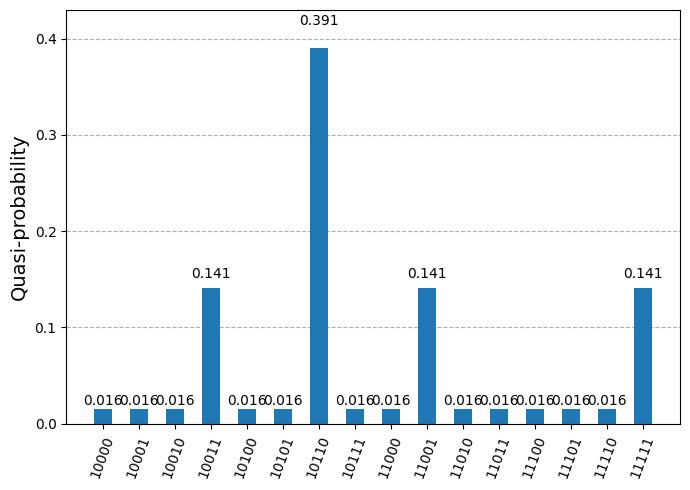

In [56]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose().decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

with the result

In [57]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state,max_size=256,precision=4,prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

However, now me mark all  four states that represent our distribution by a negative phase and perform a Grover's rotation  

In [58]:
qc = QuantumCircuit(5)

#1St magazine
#0-1 data
#Index
#2-3
qc.h(2)
qc.h(3)

#Aux Bit
qc.x(4)
qc.h(4)

qc.barrier()
#First patern
qc.ccx(2,3,0)
qc.ccx(2,3,1)

qc.barrier()
#Second patern
qc.x(2)
qc.ccx(2,3,0)
qc.x(2)

qc.barrier()
#Third patern
qc.x(3)
qc.ccx(2,3,1)
qc.x(3)

qc.barrier()
#Fourth patern
qc.x(2)
qc.x(3)
qc.ccx(2,3,0)
qc.ccx(2,3,1)
qc.x(3)
qc.x(2)

#Oracle
qc.barrier()
qc.x(0)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(0)
qc.barrier()
qc.h(4)
#Diffusor 0, 1, 2, 3 
qc.barrier()

qc.h([0,1,2,3])
qc.x([0,1,2,3])
qc.h(0)
gate = MCXGate(3)
qc.append(gate, [1,2,3,0])
qc.h(0)
qc.x([0,1,2,3])
qc.h([0,1,2,3])

#Secend rotation

qc.barrier()
qc.h(4)
qc.barrier()

#Oracle Trick
qc.x(0)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(0)

qc.x(2)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(2)

qc.x(1)
qc.x(2)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(2)
qc.x(1)

gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])

qc.barrier()
qc.h(4)
#Diffusor 0, 1, 2, 3 
qc.barrier()

qc.h([0,1,2,3])
qc.x([0,1,2,3])
qc.h(0)
gate = MCXGate(3)
qc.append(gate, [1,2,3,0])
qc.h(0)
qc.x([0,1,2,3])
qc.h([0,1,2,3])

qc.draw(fold=400)

░ ┌───┐      ░      ┌───┐      ░                 ░      ┌───┐           ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░       ░ ┌───┐     ┌───┐                                    ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q_0: ───────────░─┤ X ├──────░──────┤ X ├──────░─────────────────░──────┤ X ├───────────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░───────░─┤ X ├──■──┤ X ├───────■──────────────■─────────■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
                ░ └─┬─┘┌───┐ ░      └─┬─┘      ░      ┌───┐      ░      └─┬─┘┌───┐      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░       ░ └───┘  │  └───┘       │  ┌───┐       │  ┌───┐  │   ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘
q_1: ───────────░───┼──┤ X ├─░────────┼────────░──────┤ X ├──────░────────┼──┤ X ├──────░────────■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░────────■──────────────■──┤ X ├───────■──┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ┌───┐      ░   │  └─┬─┘ ░ ┌───┐  │  ┌───┐ ░      └─┬─┘      ░ ┌───┐  │  └─┬─┘┌───┐ ░        │        ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░        │  ┌───┐       │  ├───┤┌───┐  │  ├───┤  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├──────░───■────■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■────■──┤ X ├─░────────■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░────────■──┤ X ├───────■──┤ X ├┤ X ├──■──┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤      ░   │    │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░ ┌───┐  │  ├───┤┌───┐  │  ├───┤└───┘  │  └───┘  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤     
q_3: ┤ H ├──────░───■────■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░─┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├───────■─────────■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤┌───┐ ░            ░                 ░ └───┘     └───┘ ░ └───┘          └───┘ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░ ┌───┐ ░ └───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘     ┌─┴─┐     ┌─┴─┐ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘     
q_4: ┤ X ├┤ H ├─░────────────░─────────────────░─────────────────░──────────────────────░──────┤ X ├──────░─┤ H ├─░─────────────────────────────────────░─┤ H ├─░──────┤ X ├──────────┤ X ├──────────┤ X ├─────┤ X ├─░─┤ H ├─░────────────────────────────────────
     └───┘└───┘ ░            ░                 ░                 ░                      ░      └───┘      ░ └───┘ ░                                     ░ └───┘ ░      └───┘          └───┘          └───┘     └───┘ ░ └───┘ ░


Total count are: {np.str_('10000'): np.float64(0.015625), np.str_('10001'): np.float64(0.015625), np.str_('10010'): np.float64(0.015625), np.str_('10011'): np.float64(0.015625), np.str_('10100'): np.float64(0.015625), np.str_('10101'): np.float64(0.015625), np.str_('10110'): np.float64(0.765624999999997), np.str_('10111'): np.float64(0.015625), np.str_('11000'): np.float64(0.015625), np.str_('11001'): np.float64(0.015625), np.str_('11010'): np.float64(0.015625), np.str_('11011'): np.float64(0.015625), np.str_('11100'): np.float64(0.015625), np.str_('11101'): np.float64(0.015625), np.str_('11110'): np.float64(0.015625), np.str_('11111'): np.float64(0.015625)}


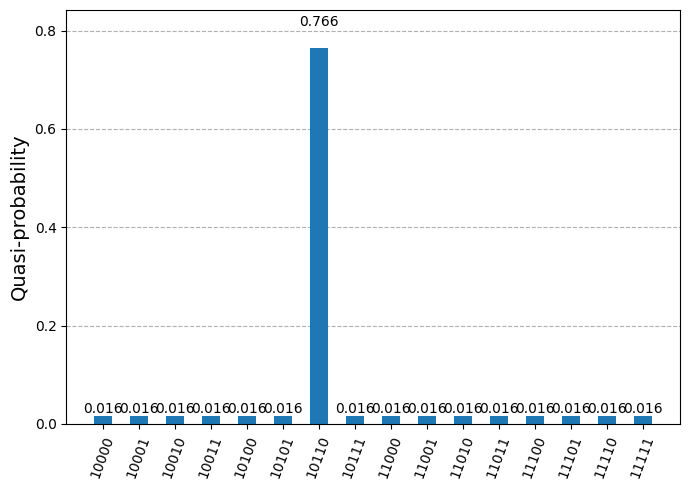

In [59]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose().decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

with the result

In [60]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state,max_size=256,precision=4,prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

We mark again all  four states that represent our distribution by a negative phase and perform a Grover's rotation

In [61]:
qc = QuantumCircuit(5)

#1St magazine
#0-1 data
#Index
#2-3
qc.h(2)
qc.h(3)

#Aux Bit
qc.x(4)
qc.h(4)

qc.barrier()
#First patern
qc.ccx(2,3,0)
qc.ccx(2,3,1)

qc.barrier()
#Second patern
qc.x(2)
qc.ccx(2,3,0)
qc.x(2)

qc.barrier()
#Third patern
qc.x(3)
qc.ccx(2,3,1)
qc.x(3)

qc.barrier()
#Fourth patern
qc.x(2)
qc.x(3)
qc.ccx(2,3,0)
qc.ccx(2,3,1)
qc.x(3)
qc.x(2)

#Oracle
qc.barrier()
qc.x(0)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(0)
qc.barrier()
qc.h(4)
#Diffusor 0, 1, 2, 3 
qc.barrier()

qc.h([0,1,2,3])
qc.x([0,1,2,3])
qc.h(0)
gate = MCXGate(3)
qc.append(gate, [1,2,3,0])
qc.h(0)
qc.x([0,1,2,3])
qc.h([0,1,2,3])

#Secend rotation
qc.barrier()
qc.h(4)
qc.barrier()

#Oracle Trick
qc.x(0)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(0)

qc.x(2)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(2)

qc.x(1)
qc.x(2)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(2)
qc.x(1)

gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])

qc.barrier()
qc.h(4)
#Diffusor 0, 1, 2, 3 
qc.barrier()

qc.h([0,1,2,3])
qc.x([0,1,2,3])
qc.h(0)
gate = MCXGate(3)
qc.append(gate, [1,2,3,0])
qc.h(0)
qc.x([0,1,2,3])
qc.h([0,1,2,3])

#Third rotation
qc.barrier()
qc.h(4)
qc.barrier()

#Oracle Trick
qc.x(0)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(0)

qc.x(2)
qc.x(3)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(3)
qc.x(2)

qc.x(1)
qc.x(2)
gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.x(2)
qc.x(1)

gate = MCXGate(4)
qc.append(gate, [0,1,2,3,4])
qc.barrier()
qc.h(4)

#Diffusor 0, 1, 2, 3 
qc.barrier()

qc.h([0,1,2,3])
qc.x([0,1,2,3])
qc.h(0)
gate = MCXGate(3)
qc.append(gate, [1,2,3,0])
qc.h(0)
qc.x([0,1,2,3])
qc.h([0,1,2,3])

qc.draw(fold=100)

░ ┌───┐      ░      ┌───┐      ░                 ░      ┌───┐           ░ ┌───┐»
q_0: ───────────░─┤ X ├──────░──────┤ X ├──────░─────────────────░──────┤ X ├───────────░─┤ X ├»
                ░ └─┬─┘┌───┐ ░      └─┬─┘      ░      ┌───┐      ░      └─┬─┘┌───┐      ░ └───┘»
q_1: ───────────░───┼──┤ X ├─░────────┼────────░──────┤ X ├──────░────────┼──┤ X ├──────░──────»
     ┌───┐      ░   │  └─┬─┘ ░ ┌───┐  │  ┌───┐ ░      └─┬─┘      ░ ┌───┐  │  └─┬─┘┌───┐ ░      »
q_2: ┤ H ├──────░───■────■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■────■──┤ X ├─░──────»
     ├───┤      ░   │    │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │    │  ├───┤ ░ ┌───┐»
q_3: ┤ H ├──────░───■────■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├»
     ├───┤┌───┐ ░            ░                 ░ └───┘     └───┘ ░ └───┘          └───┘ ░ └───┘»
q_4: ┤ X ├┤ H ├─░────────────░─────────────────░─────────────────░──────────────────────░──────»
     └───┘└───┘ ░            ░                 ░                 ░                      ░      »
«          ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░       ░ ┌───┐     ┌───┐          »
«q_0: ──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░───────░─┤ X ├──■──┤ X ├───────■──»
«       │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░       ░ └───┘  │  └───┘       │  »
«q_1: ──■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░────────■──────────────■──»
«       │        ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░        │  ┌───┐       │  »
«q_2: ──■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░────────■──┤ X ├───────■──»
«       │  ┌───┐ ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░ ┌───┐  │  ├───┤┌───┐  │  »
«q_3: ──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░─┤ X ├──■──┤ X ├┤ X ├──■──»
«     ┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░ ┌───┐ ░ └───┘┌─┴─┐└───┘└───┘┌─┴─┐»
«q_4: ┤ X ├──────░─┤ H ├─░─────────────────────────────────────░─┤ H ├─░──────┤ X ├──────────┤ X ├»
«     └───┘      ░ └───┘ ░                                     ░ └───┘ ░      └───┘          └───┘»
«                               ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░       ░ ┌───┐     »
«q_0: ────────────■─────────■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░───────░─┤ X ├──■──»
«     ┌───┐       │  ┌───┐  │   ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░       ░ └───┘  │  »
«q_1: ┤ X ├───────■──┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░────────■──»
«     ├───┤┌───┐  │  ├───┤  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░        │  »
«q_2: ┤ X ├┤ X ├──■──┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░────────■──»
«     ├───┤└───┘  │  └───┘  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░ ┌───┐  │  »
«q_3: ┤ X ├───────■─────────■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░─┤ X ├──■──»
«     └───┘     ┌─┴─┐     ┌─┴─┐ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░ ┌───┐ ░ └───┘┌─┴─┐»
«q_4: ──────────┤ X ├─────┤ X ├─░─┤ H ├─░─────────────────────────────────────░─┤ H ├─░──────┤ X ├»
«               └───┘     └───┘ ░ └───┘ ░                                     ░ └───┘ ░      └───┘»
«     ┌───┐                                    ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
«q_0: ┤ X ├───────■──────────────■─────────■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
«     └───┘       │  ┌───┐       │  ┌───┐  │   ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘
«q_1: ────────────■──┤ X ├───────■──┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
«     ┌───┐       │  ├───┤┌───┐  │  ├───┤  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤     
«q_2: ┤ X ├───────■──┤ X ├┤ X ├──■──┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
«     ├───┤┌───┐  │  ├───┤└───┘  │  └───┘  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤     
«q_3: ┤ X ├┤ X ├──■──┤ X ├───────■─────────■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
«    


Total count are: {np.str_('10110'): np.float64(0.999999999999992)}


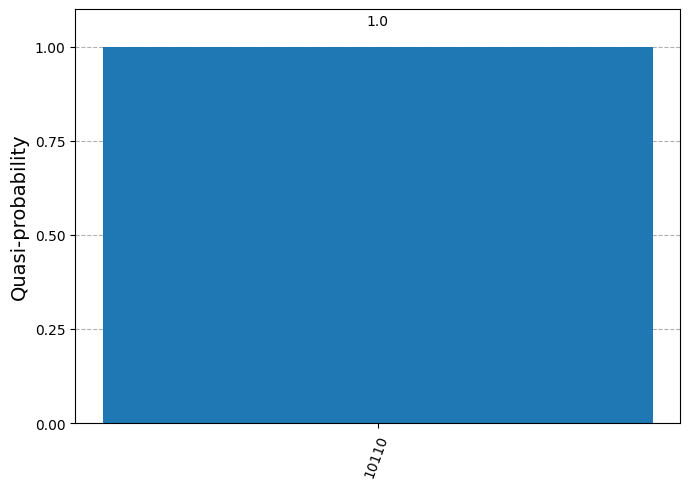

In [62]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose().decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

with the amplitude one indicating the target state. 

In [63]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state,max_size=256,precision=4,prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

Depending on the distribution and the relation between $m$ (the number of patterns) and  $n$ (the dimension of patterns), we  have to correct by marking all present state till  all states without the target state reach an  uniform distribution.
